In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df = pd.read_csv('barcelona_squad_history.csv')
print(df.head())

           team     season    role    position  shirt_number  \
0  FC Barcelona  2022/2023  Player  Goalkeeper           1.0   
1  FC Barcelona  2022/2023  Player    Defender           4.0   
2  FC Barcelona  2022/2023  Player  Midfielder           5.0   
3  FC Barcelona  2022/2023  Player  Midfielder           6.0   
4  FC Barcelona  2022/2023  Player     Forward           7.0   

               full_name  country  is_overseas   birthdate  
0  Marc-André ter Stegen  Germany            1  1992-04-30  
1          Ronald Araújo  Uruguay            1  1999-03-07  
2               Busquets    Spain            0  1988-07-16  
3                   Gavi    Spain            0  2004-08-05  
4        Ousmane Dembélé   France            1  1997-05-15  


In [4]:
df['birthdate'] = pd.to_datetime(df['birthdate'], errors='coerce')

In [5]:
df['season_year'] = df['season'].str.split('/').str[0].astype(int)

In [6]:
df['age'] = df['season_year'] - df['birthdate'].dt.year

In [7]:
print(df[['full_name', 'season', 'birthdate', 'age']].head())

               full_name     season  birthdate   age
0  Marc-André ter Stegen  2022/2023 1992-04-30  30.0
1          Ronald Araújo  2022/2023 1999-03-07  23.0
2               Busquets  2022/2023 1988-07-16  34.0
3                   Gavi  2022/2023 2004-08-05  18.0
4        Ousmane Dembélé  2022/2023 1997-05-15  25.0


Age distribution of players in 2022/2023 season :

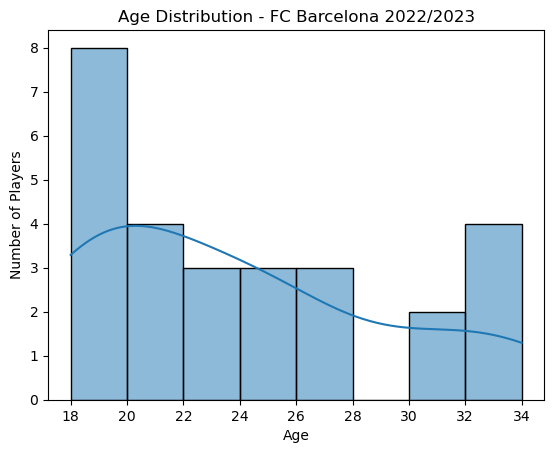

In [8]:
players_df = df[df['role'] == 'Player']
season_2023 = players_df[players_df['season'] == '2022/2023']
sns.histplot(season_2023['age'], bins=8, kde=True)
plt.title("Age Distribution - FC Barcelona 2022/2023")
plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.show()

Oversea vs Local Players (All Seasons):

In [9]:
players_df = df[df['role'] == 'Player']

In [10]:
overseas_counts = players_df['is_overseas'].value_counts()
overseas_counts.index = ['Local', 'Overseas']
print(overseas_counts)

Local       1924
Overseas     633
Name: count, dtype: int64


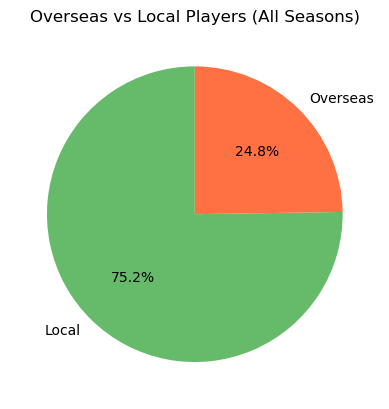

In [11]:
colors = ['#66bb6a', '#ff7043']
overseas_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Overseas vs Local Players (All Seasons)")
plt.ylabel('')
plt.show()

Oversea vs Local (Per Season) :

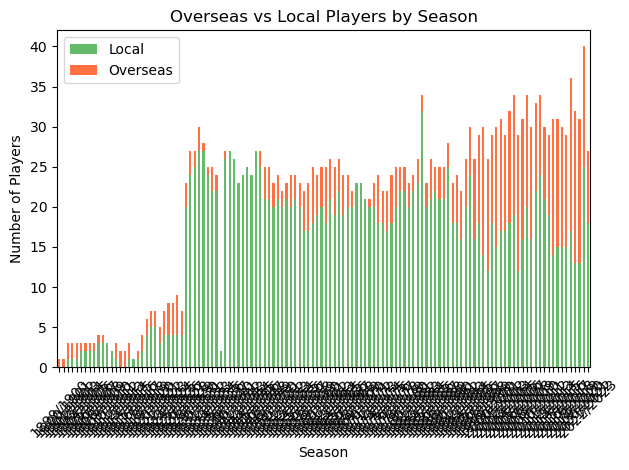

In [12]:
season_group = players_df.groupby(['season', 'is_overseas'])['full_name'].count().unstack()

season_group.columns = ['Local', 'Overseas']

season_group.plot(kind='bar', stacked=True, color=['#66bb6a', '#ff7043'])
plt.title("Overseas vs Local Players by Season")
plt.ylabel("Number of Players")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Count players per country(This will show the top 10 countries with the most players in the dataset):

In [16]:
top_countries = players_df['country'].value_counts().head(10)
print(top_countries)

country
Spain          1924
Brazil           90
Argentina        84
Netherlands      79
France           51
Uruguay          37
Germany          36
Hungary          33
Portugal         23
Mexico           14
Name: count, dtype: int64


Bar Plot of Top Countries:

C:\Users\sabbi\AppData\Local\Temp\ipykernel_3524\2501167867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


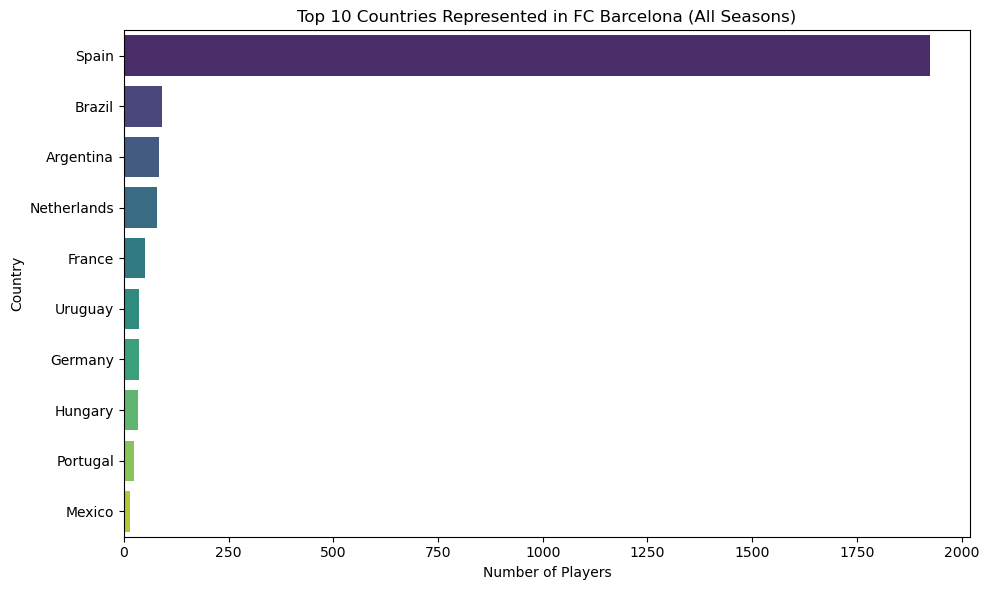

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries Represented in FC Barcelona (All Seasons)")
plt.xlabel("Number of Players")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

Average Age Per Season:

In [18]:
avg_age_per_season = players_df.groupby('season')['age'].mean().sort_index()
print(avg_age_per_season)

season
1899/1900    22.000000
1900/1901    23.000000
1901/1902    21.666667
1902/1903    22.666667
1903/1904    22.000000
               ...    
2018/2019    24.055556
2019/2020    25.000000
2020/2021    24.129032
2021/2022    23.875000
2022/2023    23.814815
Name: age, Length: 122, dtype: float64


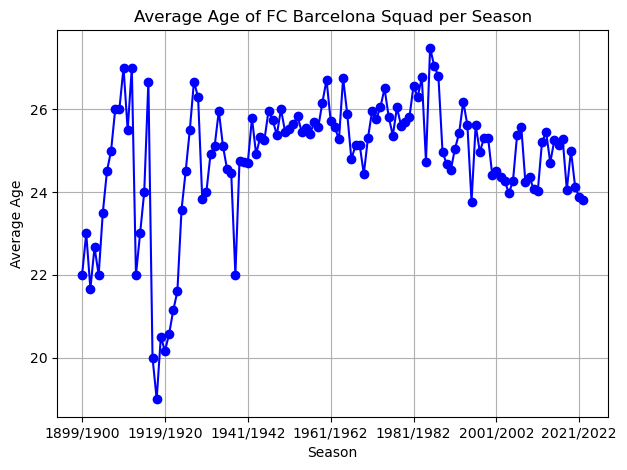

In [19]:
avg_age_per_season.plot(marker='o', color='blue')
plt.title('Average Age of FC Barcelona Squad per Season')
plt.xlabel('Season')
plt.ylabel('Average Age')
plt.grid(True)
plt.tight_layout()
plt.show()

Analyze Foreign Player Growth:

In [20]:
players_df = df[df['role'] == 'Player']

foreign_stats = players_df.groupby(['season', 'is_overseas'])['full_name'].count().unstack().fillna(0)
foreign_stats.columns = ['Local', 'Overseas']
foreign_stats = foreign_stats.sort_index()

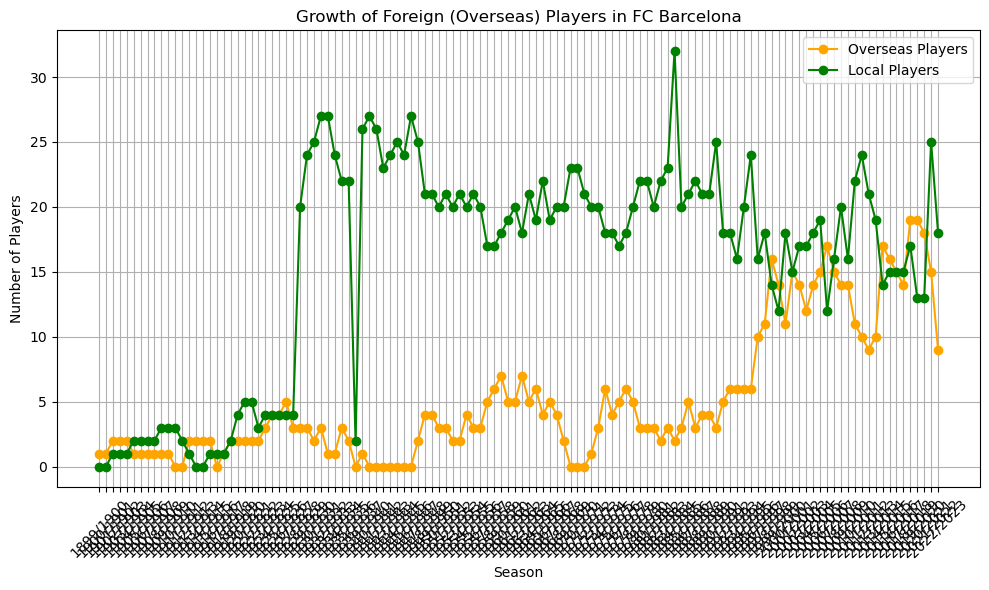

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(foreign_stats.index, foreign_stats['Overseas'], marker='o', color='orange', label='Overseas Players')
plt.plot(foreign_stats.index, foreign_stats['Local'], marker='o', color='green', label='Local Players')

plt.title("Growth of Foreign (Overseas) Players in FC Barcelona")
plt.xlabel("Season")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Find Longest Continuous Streaks:

In [22]:
players_df = df[df['role'] == 'Player']
players_df['season_start'] = players_df['season'].str.split('/').str[0].astype(int)
player_seasons = players_df[['full_name', 'season_start']].drop_duplicates()

C:\Users\sabbi\AppData\Local\Temp\ipykernel_3524\656812150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_df['season_start'] = players_df['season'].str.split('/').str[0].astype(int)


In [23]:
def longest_streak(seasons):
    seasons = sorted(seasons)
    max_streak = streak = 1
    for i in range(1, len(seasons)):
        if seasons[i] == seasons[i-1] + 1:
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 1
    return max_streak

streaks = player_seasons.groupby('full_name')['season_start'].apply(longest_streak)
streaks = streaks.sort_values(ascending=False)

In [25]:
print(streaks.head(20))

full_name
Xavi                 18
Lionel Messi         17
Iniesta              16
Joan Segarra         16
Migueli              15
Puyol                15
Ramallets            15
Ferran Olivella      15
Sadurní              15
Busquets             15
Rexach               15
Emilio Sagi Liñán    15
Piqué                14
Gonzalvo             14
José Seguer          14
Gracia               14
Víctor Valdés        14
Calvet               13
Samitier             13
Rifé                 13
Name: season_start, dtype: int64


Returning Players (Players who left and came back (appeared in non-continuous seasons)):

In [27]:
players_df = df[df['role'] == 'Player'].copy()
players_df['season_start'] = players_df['season'].str[:4].astype(int)
player_seasons = players_df[['full_name', 'season_start']].drop_duplicates()

In [28]:
def has_gap(season_list):
    seasons = sorted(season_list)
    for i in range(1, len(seasons)):
        if seasons[i] != seasons[i-1] + 1:
            return True
    return False

In [29]:

returning_players = (
    player_seasons.groupby('full_name')['season_start']
    .apply(has_gap)
)

returned = returning_players[returning_players == True].index.tolist()

In [30]:
print("Returning Players (Non-continuous Seasons):")
for player in returned:
    years = sorted(player_seasons[player_seasons['full_name'] == player]['season_start'])
    print(f"{player}: {years}")

Returning Players (Non-continuous Seasons):
Adama Traoré: [2013, 2014, 2021]
Adriàn Ortolà: [2015, 2017]
Albadalejo: [1974, 1975, 1978, 1979, 1980]
Alcántara: [1912, 1913, 1914, 1915, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926]
Angoy: [1990, 1994, 1995]
Arda Turan: [2015, 2016, 2019]
Balmanya: [1935, 1936, 1941, 1942, 1943]
Bosch: [1928, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957]
Busquets: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Calo: [1944, 1945, 1946, 1948, 1949]
Carreras: [1984, 1990, 1991, 1992, 1995]
Carreño: [1973, 1976, 1977]
Celdrán: [1959, 1961, 1962]
Coll: [1956, 1958, 1959, 1960]
Coutinho: [2017, 2018, 2020]
Cristian Tello: [2011, 2012, 2013, 2016]
Cristóbal Parralo: [1987, 1991]
Cuadrado: [1998, 2000]
Dani Alves: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2021]
De la Peña: [1995, 1996, 1997, 2000]
Escola: [1934, 1935, 1936, 1940, 1941, 1942, 1943, 19